In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
titanic_data=pd.read_csv('Titanic-Dataset.csv')

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_data=titanic_data.dropna()

In [7]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
x=titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'],axis=1)
y=titanic_data['Survived']

In [9]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare
1,1,female,38.0,1,0,71.2833
3,1,female,35.0,1,0,53.1000
6,1,male,54.0,0,0,51.8625
10,3,female,4.0,1,1,16.7000
11,1,female,58.0,0,0,26.5500
...,...,...,...,...,...,...
871,1,female,47.0,1,1,52.5542
872,1,male,33.0,0,0,5.0000
879,1,female,56.0,0,1,83.1583
887,1,female,19.0,0,0,30.0000


In [10]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [21]:
titanic_data.dropna(inplace=True)

In [24]:
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
titanic_data['Sex'] = le_sex.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = le_embarked.fit_transform(titanic_data['Embarked'])

In [11]:
x=pd.get_dummies(x, columns=['Sex'],drop_first=False)

In [12]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
1,1,38.0,1,0,71.2833,True,False
3,1,35.0,1,0,53.1000,True,False
6,1,54.0,0,0,51.8625,False,True
10,3,4.0,1,1,16.7000,True,False
11,1,58.0,0,0,26.5500,True,False
...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,True,False
872,1,33.0,0,0,5.0000,False,True
879,1,56.0,0,1,83.1583,True,False
887,1,19.0,0,0,30.0000,True,False


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")


Accuracy: 0.78


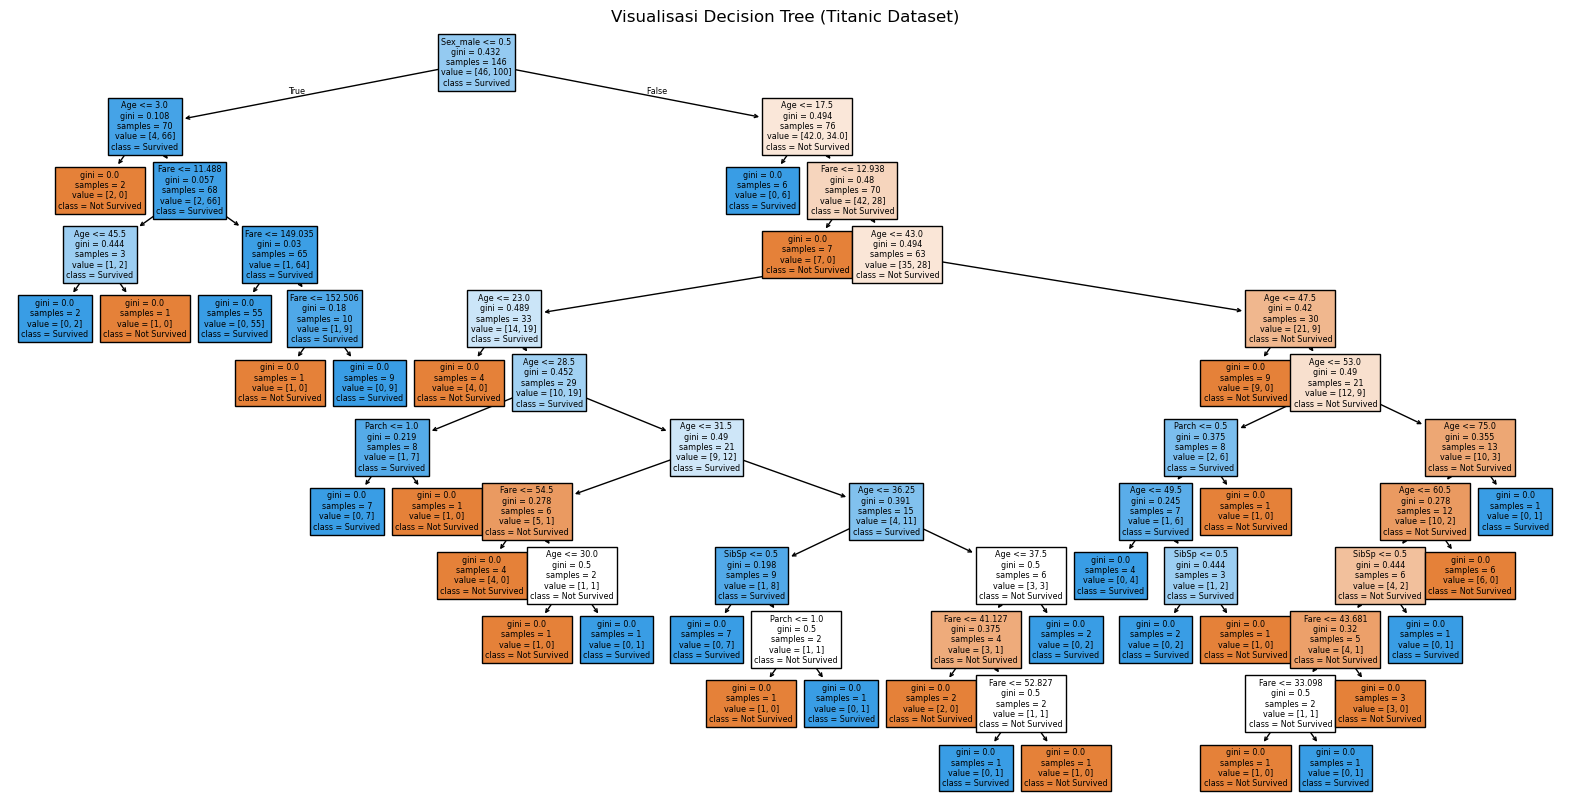

In [28]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=x.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Visualisasi Decision Tree (Titanic Dataset)")
plt.show()